# Exploratory Data Analysis with NLP Tools

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import nltk
from nltk.corpus import stopwords
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set path to cryptocurrency csv files
path = '../Data/Reddit_Comments/Cryptocurrency/'

files = os.listdir(path)

# Create list of csv file names
csv_list = []
for f in files:
    csv_list.append(f)

In [5]:
csv_list = csv_list[:-1]
csv_list

['Cryptocurrency_2021-08-07.csv',
 'Cryptocurrency_2021-08-08.csv',
 'Cryptocurrency_2021-08-09.csv',
 'Cryptocurrency_2021-08-10.csv',
 'Cryptocurrency_2021-08-11.csv',
 'Cryptocurrency_2021-08-12.csv',
 'Cryptocurrency_2021-08-13.csv',
 'Cryptocurrency_2021-08-14.csv',
 'Cryptocurrency_2021-08-15.csv',
 'Cryptocurrency_2021-08-16.csv',
 'Cryptocurrency_2021-08-17.csv',
 'Cryptocurrency_2021-08-18.csv',
 'Cryptocurrency_2021-08-19.csv',
 'Cryptocurrency_2021-08-20.csv',
 'Cryptocurrency_2021-08-21.csv',
 'Cryptocurrency_2021-08-22.csv',
 'Cryptocurrency_2021-08-23.csv',
 'Cryptocurrency_2021-08-24.csv',
 'Cryptocurrency_2021-08-25.csv',
 'Cryptocurrency_2021-08-26.csv',
 'Cryptocurrency_2021-08-27.csv',
 'Cryptocurrency_2021-08-28.csv',
 'Cryptocurrency_2021-08-29.csv',
 'Cryptocurrency_2021-08-30.csv',
 'Cryptocurrency_2021-08-31.csv',
 'Cryptocurrency_2021-09-01.csv',
 'Cryptocurrency_2021-09-02.csv',
 'Cryptocurrency_2021-09-03.csv',
 'Cryptocurrency_2021-09-04.csv',
 'Cryptocurren

## Read csv file

In [7]:
csv_list[0]

'Cryptocurrency_2021-08-07.csv'

In [10]:
df = pd.read_csv(path + csv_list[0])
df.head()

,author,author_fullname,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink
0,HiCarumba,t2_95jx76vi,False,Yes Brother. This is the way.,NaN,NaN,1628333279,1,h81jxny,t1_h81jvaa,/r/CryptoCurrency/comments/ozr28z/it_was_proph...
1,baeiby,t2_7htt0be3,False,"Lol to be very honest, I knew close to zilch a...",NaN,NaN,1628333279,2,h81jxnr,t1_h81jn5u,/r/CryptoCurrency/comments/ozqz9m/i_trust_peop...
2,NotRyanPace,t2_xgk0k,False,"End of year, take the ""Last call for ETH under...",NaN,NaN,1628333278,1,h81jxmq,t1_h81jqki,/r/CryptoCurrency/comments/ozinnf/daily_discus...
3,BountyManagerBD,t2_8nbdzghw,False,ESCROW PROTOCOL are aiming to attract users fr...,NaN,NaN,1628333277,1,h81jxlg,t3_o2e67b,/r/CryptoCurrency/comments/o2e67b/escrow_proto...
4,Gabus_Bego,t2_bbs0wmdt,False,"Thank you, my dude.",NaN,NaN,1628333276,1,h81jxk6,t1_h81jtfb,/r/CryptoCurrency/comments/ozinnf/daily_discus...


In [11]:
df.shape

(100000, 11)

In [12]:
df.describe()

,comment_type,created_utc,score
count,0.0,1.000000e+05,100000.000000
mean,NaN,1.628359e+09,2.152550
std,NaN,2.351560e+04,8.935004
min,NaN,1.628316e+09,-38.000000
25%,NaN,1.628340e+09,1.000000
50%,NaN,1.628358e+09,1.000000
75%,NaN,1.628379e+09,2.000000
max,NaN,1.628402e+09,1381.000000


In [13]:
df.dtypes

author                    object
author_fullname           object
author_premium            object
body                      object
collapsed_reason_code     object
comment_type             float64
created_utc                int64
score                      int64
id                        object
parent_id                 object
permalink                 object
dtype: object

## Data Cleaning

In [14]:
# Identify number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


In [15]:
# Remove all rows that have NaN in df['body']
df = df[df['body'].notna()]

In [16]:
df = df[df.author != "AutoModerator"]

In [17]:
df.head()

,author,author_fullname,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink
0,HiCarumba,t2_95jx76vi,False,Yes Brother. This is the way.,NaN,NaN,1628333279,1,h81jxny,t1_h81jvaa,/r/CryptoCurrency/comments/ozr28z/it_was_proph...
1,baeiby,t2_7htt0be3,False,"Lol to be very honest, I knew close to zilch a...",NaN,NaN,1628333279,2,h81jxnr,t1_h81jn5u,/r/CryptoCurrency/comments/ozqz9m/i_trust_peop...
2,NotRyanPace,t2_xgk0k,False,"End of year, take the ""Last call for ETH under...",NaN,NaN,1628333278,1,h81jxmq,t1_h81jqki,/r/CryptoCurrency/comments/ozinnf/daily_discus...
3,BountyManagerBD,t2_8nbdzghw,False,ESCROW PROTOCOL are aiming to attract users fr...,NaN,NaN,1628333277,1,h81jxlg,t3_o2e67b,/r/CryptoCurrency/comments/o2e67b/escrow_proto...
4,Gabus_Bego,t2_bbs0wmdt,False,"Thank you, my dude.",NaN,NaN,1628333276,1,h81jxk6,t1_h81jtfb,/r/CryptoCurrency/comments/ozinnf/daily_discus...


## Analyzing Text Statistics

In [32]:
# Word Number Histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

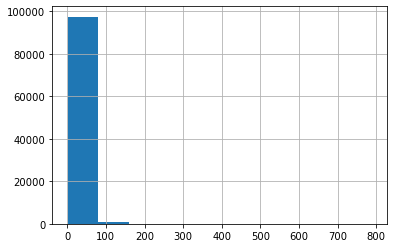

In [33]:
plot_word_number_histogram(df['body'])

In [30]:
# Average word length histogram for each sentence
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

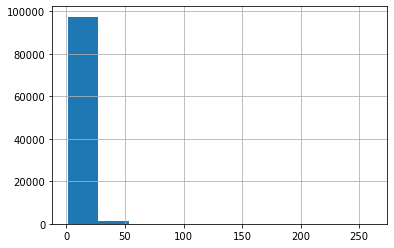

In [31]:
plot_word_length_histogram(df['body'])

## NLTK

In [24]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Plot Top Stopwords Barchart
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

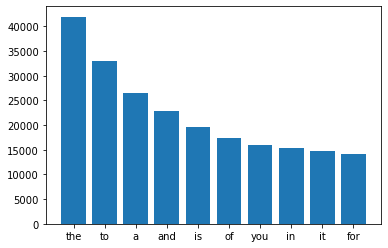

In [29]:
plot_top_stopwords_barchart(df['body'])

In [35]:
# Top Non-Stopwords Barchart
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

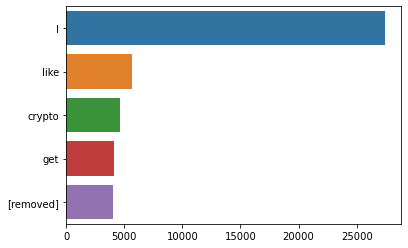

In [36]:
plot_top_non_stopwords_barchart(df['body'])

## Ngram Exploration

In [37]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [38]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

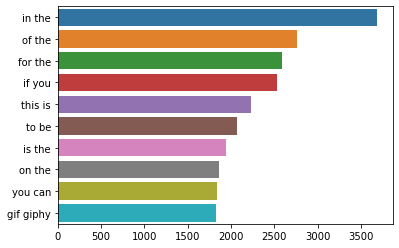

In [39]:
plot_top_ngrams_barchart(df['body'],2)

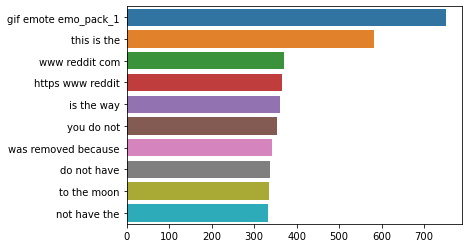

In [40]:
plot_top_ngrams_barchart(df['body'],3)

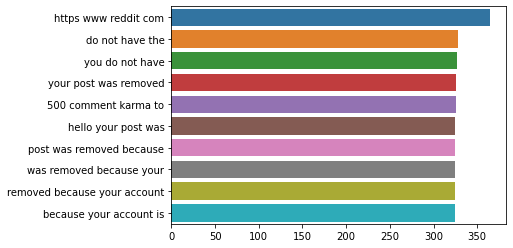

In [41]:
plot_top_ngrams_barchart(df['body'],4)

## Topic Modeling Exploration with pyLDAvis

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
# Tokenize and Lemmatize the data
def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['body']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(news)

In [ ]:
# Create bag of words with gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

## Sentiment Analysis with Vader

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
# pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
# function to calculate polarity scores
pol = lambda x: analyser.polarity_scores(x)

In [ ]:
clean_df = df
clean_df.head()

,author,author_fullname,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink
0,HiCarumba,t2_95jx76vi,False,Yes Brother. This is the way.,NaN,NaN,1628333279,1,h81jxny,t1_h81jvaa,/r/CryptoCurrency/comments/ozr28z/it_was_proph...
1,baeiby,t2_7htt0be3,False,"Lol to be very honest, I knew close to zilch a...",NaN,NaN,1628333279,2,h81jxnr,t1_h81jn5u,/r/CryptoCurrency/comments/ozqz9m/i_trust_peop...
2,NotRyanPace,t2_xgk0k,False,"End of year, take the ""Last call for ETH under...",NaN,NaN,1628333278,1,h81jxmq,t1_h81jqki,/r/CryptoCurrency/comments/ozinnf/daily_discus...
3,BountyManagerBD,t2_8nbdzghw,False,ESCROW PROTOCOL are aiming to attract users fr...,NaN,NaN,1628333277,1,h81jxlg,t3_o2e67b,/r/CryptoCurrency/comments/o2e67b/escrow_proto...
4,Gabus_Bego,t2_bbs0wmdt,False,"Thank you, my dude.",NaN,NaN,1628333276,1,h81jxk6,t1_h81jtfb,/r/CryptoCurrency/comments/ozinnf/daily_discus...


In [ ]:
clean_df = clean_df[clean_df['body'].str.contains('Bitcoin|BTC', case=False)]
clean_df.head()

,author,author_fullname,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink
6,atomwest314,t2_x50okt,True,i noticed this too peeps like 'o wow ICP go up...,NaN,NaN,1628333275,3,h81jxhz,t3_ozr2hx,/r/CryptoCurrency/comments/ozr2hx/can_we_pleas...
23,Shrappy16,t2_4e2hp2d0,False,Probably know the answer: If you earned enough...,NaN,NaN,1628333265,1,h81jx4f,t3_oznwv4,/r/CryptoCurrency/comments/oznwv4/eth_just_com...
29,Odd_Copy_8077,t2_ajd0894j,False,A boy asked his bitcoin-investing dad for 1 bi...,NaN,NaN,1628333261,4,h81jwxn,t1_h81jr69,/r/CryptoCurrency/comments/ozinnf/daily_discus...
91,Much-Weekend-8882,t2_66sa37r1,False,Is this all time high of eth/btc ratio?,NaN,NaN,1628333204,2,h81juiz,t3_ozinnf,/r/CryptoCurrency/comments/ozinnf/daily_discus...
114,itsglocx,t2_c3slvp4i,False,can you imagine being mad at bitcoin going dow...,NaN,NaN,1628341913,1,h81wcat,t3_ozsz9f,/r/CryptoCurrency/comments/ozsz9f/a_snapshot_i...


In [ ]:
clean_df.shape

(3716, 11)

In [ ]:
# creating new column 'polarity' in clean_df
clean_df['polarity'] = clean_df['body'].apply(pol)

<ipython-input-45-d9d84613ce45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['polarity'] = clean_df['body'].apply(pol)


In [ ]:
# checking that worked
clean_df.head()

,author,author_fullname,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink,polarity
6,atomwest314,t2_x50okt,True,i noticed this too peeps like 'o wow ICP go up...,NaN,NaN,1628333275,3,h81jxhz,t3_ozr2hx,/r/CryptoCurrency/comments/ozr2hx/can_we_pleas...,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp..."
23,Shrappy16,t2_4e2hp2d0,False,Probably know the answer: If you earned enough...,NaN,NaN,1628333265,1,h81jx4f,t3_oznwv4,/r/CryptoCurrency/comments/oznwv4/eth_just_com...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
29,Odd_Copy_8077,t2_ajd0894j,False,A boy asked his bitcoin-investing dad for 1 bi...,NaN,NaN,1628333261,4,h81jwxn,t1_h81jr69,/r/CryptoCurrency/comments/ozinnf/daily_discus...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
91,Much-Weekend-8882,t2_66sa37r1,False,Is this all time high of eth/btc ratio?,NaN,NaN,1628333204,2,h81juiz,t3_ozinnf,/r/CryptoCurrency/comments/ozinnf/daily_discus...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
114,itsglocx,t2_c3slvp4i,False,can you imagine being mad at bitcoin going dow...,NaN,NaN,1628341913,1,h81wcat,t3_ozsz9f,/r/CryptoCurrency/comments/ozsz9f/a_snapshot_i...,"{'neg': 0.104, 'neu': 0.697, 'pos': 0.199, 'co..."


In [ ]:
# dropping unessential columns and seperating out 'polarity' dictionary
df2 = pd.concat([clean_df.drop(['author_fullname'], axis=1), clean_df['polarity'].apply(pd.Series)], axis=1)

In [ ]:
df2.head()

,author,author_premium,body,collapsed_reason_code,comment_type,created_utc,score,id,parent_id,permalink,polarity,neg,neu,pos,compound
6,atomwest314,True,i noticed this too peeps like 'o wow ICP go up...,NaN,NaN,1628333275,3,h81jxhz,t3_ozr2hx,/r/CryptoCurrency/comments/ozr2hx/can_we_pleas...,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...",0.000,0.759,0.241,0.9013
23,Shrappy16,False,Probably know the answer: If you earned enough...,NaN,NaN,1628333265,1,h81jx4f,t3_oznwv4,/r/CryptoCurrency/comments/oznwv4/eth_just_com...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
29,Odd_Copy_8077,False,A boy asked his bitcoin-investing dad for 1 bi...,NaN,NaN,1628333261,4,h81jwxn,t1_h81jr69,/r/CryptoCurrency/comments/ozinnf/daily_discus...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
91,Much-Weekend-8882,False,Is this all time high of eth/btc ratio?,NaN,NaN,1628333204,2,h81juiz,t3_ozinnf,/r/CryptoCurrency/comments/ozinnf/daily_discus...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
114,itsglocx,False,can you imagine being mad at bitcoin going dow...,NaN,NaN,1628341913,1,h81wcat,t3_ozsz9f,/r/CryptoCurrency/comments/ozsz9f/a_snapshot_i...,"{'neg': 0.104, 'neu': 0.697, 'pos': 0.199, 'co...",0.104,0.697,0.199,0.4404


In [ ]:
# new dataframe with average polarity score for each label
scores_df = pd.DataFrame()
scores_df['avg_positive'] = df2['pos'].mean()
scores_df['avg_neutral'] = df2['neu'].mean()
scores_df['avg_negative'] = df2['neg'].mean()
scores_df['avg_compound'] = df2['compound'].mean()

In [ ]:
scores_df.head()

,avg_positive,avg_neutral,avg_negative,avg_compound


In [ ]:
# print average polarity score for each label
print('The average Positive score = ' + str(df2['pos'].mean()))
print('The average Neutral score = ' + str(df2['neu'].mean()))
print('The average Negative score = ' + str(df2['neg'].mean()))
print('The average Compound score = ' + str(df2['compound'].mean()))

The average Positive score = 0.1009709364908503
The average Neutral score = 0.8521111410118416
The average Negative score = 0.04691872981700745
The average Compound score = 0.1707172228202371


In [ ]:
# counting unique values
u = len(pd.unique(df2['author']))
  
print("Number of unique values :", u)

Number of unique values : 1963


In [ ]:
# Count unique calues in each column
print(df2['author'].value_counts())

FireWaterGrass          44
coinfeeds-bot           36
OldWillingness7         22
milonuttigrain          19
tadgy1999               18
                        ..
JoeJ757                  1
MitchHedberg             1
creedthoughtsblog        1
Mammoth-Committee721     1
Ok_Vermicelli5652        1
Name: author, Length: 1963, dtype: int64


## Wordcloud

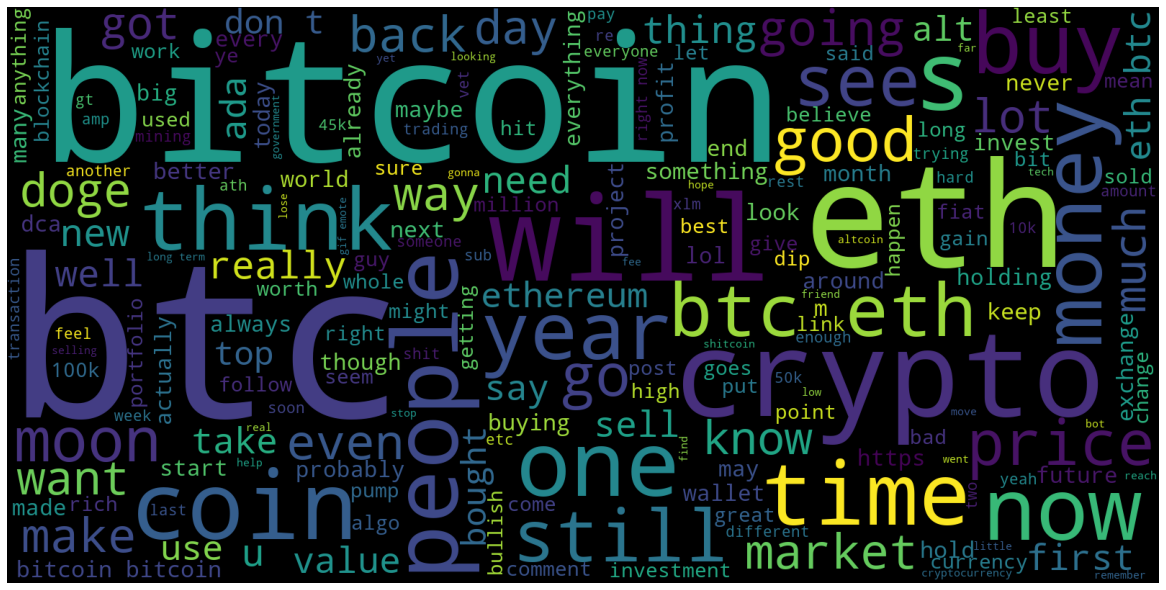

In [ ]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df2.body:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()